# Configuração do ambiente

## Instalar pacotes necessários

Suprimir FutureWarning (itens depreciados)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### PDF

#### [Tika](https://pypi.org/project/tika/)

In [2]:
!apt update -q
!apt-get install -q openjdk-11-jdk-headless

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Building dependency tree...
Reading state information...

In [3]:
%env JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64/

env: JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64/


In [4]:
!pip install tika

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%env PYTHONIOENCODING=utf8

env: PYTHONIOENCODING=utf8


In [6]:
import tika
from tika import parser

In [7]:
tika.initVM()

### Correlação Phik

In [8]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import phik

### Expressões regulares (Regex)

In [10]:
!pip install regex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import regex as re

## Importar demais pacotes utilizados

### Manipular paths do sistema de arquivos (FS)

In [12]:
import os

### Gráficos

In [13]:
#%matplotlib widget
import matplotlib.pyplot as plt

import seaborn as sns

### Trabalhar com (de)codificação Unicode

In [14]:
import unicodedata

### Análise de dados

In [15]:
import pandas as pd
import numpy as np

### ANOVA e Teste U

In [16]:
import scipy.stats as stats
import statsmodels.formula.api as smf

### Manipulação de arquivos CSV

In [17]:
import csv

## Monta diretórios dos dados e dos resultados

### Monta o Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Diretório dos dados

In [19]:
# Dados
# https://drive.google.com/drive/folders/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_?usp=sharing
#dados_path = "/content/drive/.shortcut-targets-by-id/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_/Dados"
dados_path = "/content/drive/.shortcut-targets-by-id/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_/Dados/full-pt-only"
os.chdir(dados_path)

### Diretório dos resultados

In [20]:
resultados_path = os.path.join(dados_path, 'resultados', 'tika')
print(f"Diretório de resultados: {resultados_path}")
if not os.path.exists(resultados_path):
  os.mkdir(resultados_path)

Diretório de resultados: /content/drive/.shortcut-targets-by-id/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_/Dados/full-pt-only/resultados/tika


### Funções utilitárias para recuperar arquivos do FS

#### Rejeita alguns caminhos do FS
Como nossos diretórios de resultado e de rascunho

In [21]:
def rejeitar_dirs(path):
  normalized_path = os.path.normpath(path)
  # Não queremos ler arquivos do nosso diretório de resultados
  resultados_path_upper = os.path.join(resultados_path, '..')
  dir_resultados = resultados_path_upper if not os.path.samefile(dados_path, resultados_path_upper) else resultados_path
  if os.path.samefile(normalized_path, os.path.join(resultados_path, '..')) \
    or os.path.samefile(normalized_path, os.path.join(dados_path, 'resultados')):
    return True
  # Também não queremos ler arquivos da nossa área de raschunho
  if os.path.isdir(normalized_path) and os.path.basename(normalized_path) == '_':
    return True
  # Qualquer outra coisa é não rejeitável
  return False

#### Aceitar apenas arquivos .pdf

In [22]:
def aceitar_pdfs(path):
  normalized_path = os.path.normpath(path)
  # Para evitar viéses nos dados, não contamos o artigo do Osório, 2018
  if os.path.isfile(normalized_path) \
    and os.path.basename(normalized_path).lower() == \
    'Meta-Analysis of Scientific Articles According to Statistical Criteria A Case Study in WSCAD.pdf'.lower():
    return False
  # Aceitamos outros arquivos terminando em '.pdf'
  if os.path.isfile(normalized_path) \
    and os.path.basename(normalized_path).lower().endswith('.pdf'):
    return True
  # Qualquer outra coisa é não aceitável
  return False

# Tabelas com termos para pesquisa textual
Tabelas 1, 2 e 3 do artigo \[Osório, 2018\], contendo sigla, descrição e expressão regular para os termos de busca, agrupados em 3 categorias:
* termos estatísticos
* métricas de desempenho no contexto da computação
* testes estatísticos

### Tabela 1. Termos estatı́sticos selecionados para coleta de dados

In [23]:
termos = {
  'AM': {
    'desc': 'Amostra',
    'regex': 'amostra'
  },
  'DP': {
    'desc': 'Desvio Padrão',
    'regex': 'desvio padrão'
  },
  # Unificada conforme artigo do Alessander
  'DN': {
    'desc': 'D.Normal/Gaussiana',
    'regex': 'distribuição normal|gaussiana'
  },
  # Removida conforme artigo do Alessander - relacionada a clock
  #'FR': {
  #    'desc': 'Frequência',
  #    'regex': 'frequência'
  #},
  'IC': {
    'desc': 'Intervalo de Confiança',
    'regex': 'intervalo de confiança'
  },
  'ME': {
    'desc': 'Média',
    'regex': 'média'
  },
  'NE': {
    'desc': 'Num. Execuções',
    'regex': 'número de execuções'
  },
  'NI': {
    'desc': 'Num. Iterações',
    'regex': 'numero de iterações'
  },
  'TE': {
    'desc': 'Teste/Experimento',
    'regex': 'teste|experimento|simulação'
  },
  'VR': {
    'desc': 'Variância',
    'regex': 'variância'
  }
}

In [24]:
pd.DataFrame(list(
  map(
    lambda k,v: (
      f'{v["desc"]} ({k})',
      v["regex"].replace('|',' OR ')
    ),
    termos.keys(),
    termos.values()
  )),
  columns=['Descrição', 'Chave de Pesquisa']
)\
.style\
.hide_index()\
.set_table_attributes("style='display:inline'")\
.set_table_styles([
  {'selector': '.col0', 'props': 'text-align: left;'},
  {'selector': '.col1', 'props': 'text-align: center;'},
])\
.set_caption('Tabela 1. Termos estatı́sticos selecionados para coleta de dados')

Descrição,Chave de Pesquisa
Amostra (AM),amostra
Desvio Padrão (DP),desvio padrão
D.Normal/Gaussiana (DN),distribuição normal OR gaussiana
Intervalo de Confiança (IC),intervalo de confiança
Média (ME),média
Num. Execuções (NE),número de execuções
Num. Iterações (NI),numero de iterações
Teste/Experimento (TE),teste OR experimento OR simulação
Variância (VR),variância


### Tabela 2. Métricas selecionadas para coleta de dados

In [25]:
metricas = {
    'BW': {
        'desc': 'Bandwidth',
        'regex': 'bandwidth|largura de banda'
    },
    'BP': {
        'desc': 'BPS',
        'regex': 'bits por segundo|bps'
    },
    'CN': {
        'desc': 'Capacidade Nominal',
        'regex': 'nominal capacity|capacidade nominal'
    },
    'CU': {
        'desc': 'Capacidade Utilizável',
        'regex': 'usable capacity|capacidade utilizável'
    },
    'CO': {
        'desc': 'Confiabilidade',
        'regex': 'Reliability|Confiabilidade'
    },
    'CP': {
        'desc': 'Cost/Perfornace Ratio',
        'regex': 'cost ratio|performance ratio'
    },
    'DI': {
        'desc': 'Disponibilidade',
        'regex': 'availability|disponibilidade'
    },
    'DU': {
        'desc': 'Downtime/Uptime',
        'regex': 'downtime|uptime'
    },
    'EA': {
        'desc': 'Eficiência/Acurácia',
        'regex': 'eficiência|eficácia|accuracy'
    },
    'FE': {
        'desc': 'Fator de Estiramento',
        'regex': 'strech factor|fator de estiramento'
    },
    'TO': {
        'desc': 'Tempo Ocioso',
        'regex': 'Idle time|tempo ocisoso'
    },
    'MF': {
        'desc': 'MFLOPS',
        'regex': 'MFLOPS'
    },
    'MI': {
        'desc': 'MIPS',
        'regex': 'MIPS'
    },
    'MT': {
        'desc': 'MTTF',
        'regex': 'MTTF'
    },
    'PP': {
        'desc': 'PPS',
        'regex': 'PPS'
    },
    'SU': {
        'desc': 'Speed up',
        'regex': r'speed?up'
    },
    'TR': {
        'desc': 'Tempo de Reação',
        'regex': 'reaction time|tempo de reação'
    },
    'TP': {
        'desc': 'TPS',
        'regex': 'TPS'
    }
}

In [26]:
pd.DataFrame(list(
  map(
    lambda k,v: (
      f'{v["desc"]} ({k})',
      v["regex"].replace('|',' OR ')
    ),
    metricas.keys(),
    metricas.values()
  )),
  columns=['Descrição', 'Chave de Pesquisa']
)\
.style\
.hide_index()\
.set_table_attributes("style='display:inline'")\
.set_table_styles([
  {'selector': '.col0', 'props': 'text-align: left;'},
  {'selector': '.col1', 'props': 'text-align: center;'},
])\
.set_caption('Tabela 2. Métricas selecionadas para coleta de dados')

Descrição,Chave de Pesquisa
Bandwidth (BW),bandwidth OR largura de banda
BPS (BP),bits por segundo OR bps
Capacidade Nominal (CN),nominal capacity OR capacidade nominal
Capacidade Utilizável (CU),usable capacity OR capacidade utilizável
Confiabilidade (CO),Reliability OR Confiabilidade
Cost/Perfornace Ratio (CP),cost ratio OR performance ratio
Disponibilidade (DI),availability OR disponibilidade
Downtime/Uptime (DU),downtime OR uptime
Eficiência/Acurácia (EA),eficiência OR eficácia OR accuracy
Fator de Estiramento (FE),strech factor OR fator de estiramento


### Tabela 3. Testes estatı́sticos selecionados para coleta de dados

In [27]:
testes = {
    'PV': {
        'desc': 'P-Valor',
        'regex': 'p-valor|p-value|valor p'
    },
    'AN': {
        'desc': 'Teste ANOVA',
        'regex': 'anova'
    },
    'CH': {
        'desc': 'Teste Chi-quadrado',
        'regex': 'chi-quadrado|qui-quadrado'
    },
    'TC': {
        'desc': 'Teste de Wilcoxon',
        'regex': 'wilcoxon signed-rank'
    },
    'FI': {
        'desc': 'Teste Exato de Fisher',
        'regex': 'teste exato de fisher|fisher'
    },
    'KR': {
        'desc': 'Teste Kruskal-Wallis',
        'regex': 'kruskal-wallis'
    },
    'TT': {
        'desc': 'Teste T',
        'regex': 'teste de student|t-student|t de student|student|teste[ -]?t'
    },
    'TU': {
        'desc': 'Teste U',
        'regex': 'teste U|mann-whitney|wilcoxon rank-sum'
    }
}

In [28]:
pd.DataFrame(list(
  map(
    lambda k,v: (
      f'{v["desc"]} ({k})',
      v["regex"].replace('|',' OR ')
    ),
    testes.keys(),
    testes.values()
  )),
  columns=['Descrição', 'Chave de Pesquisa']
)\
.style\
.hide_index()\
.set_table_attributes("style='display:inline'")\
.set_table_styles([
  {'selector': '.col0', 'props': 'text-align: left;'},
  {'selector': '.col1', 'props': 'text-align: center;'},
])\
.set_caption('Tabela 3. Testes estatı́sticos selecionados para coleta de dados')

Descrição,Chave de Pesquisa
P-Valor (PV),p-valor OR p-value OR valor p
Teste ANOVA (AN),anova
Teste Chi-quadrado (CH),chi-quadrado OR qui-quadrado
Teste de Wilcoxon (TC),wilcoxon signed-rank
Teste Exato de Fisher (FI),teste exato de fisher OR fisher
Teste Kruskal-Wallis (KR),kruskal-wallis
Teste T (TT),teste de student OR t-student OR t de student OR student OR teste[ -]?t
Teste U (TU),teste U OR mann-whitney OR wilcoxon rank-sum


### Outros dados

#### Artigos completos em português em cada edição do evento

In [29]:
# Contagem feita após exclusão de resumos e de artigos em inglês
# Restando apenas artigos completos em português
artigos_por_ano = {
  2001: 18,
  2003: 19,
  2004: 24,
  2005: 24,
  2006: 18,
  2007: 21,
  2008: 28,
  2009: 23,
  2010: 20,
  2011: 15,
  2012: 28,
  2013: 20,
  2014: 18,
  2015: 15,
  2016: 19,
  2017: 16,
  2018: 19,
  2019: 23,
  2020: 16,
  2021: 13,
}

# Extração de dados

### Inicialização das estruturas de dados para armazenamento dos resultados da extração

In [30]:
# Dicionário com os resultados da coleta de dados sobre termos estatísticos
# ano: {'<TERMO1>': {'<ART1>': <CONTAGEM>, ..., '<ARTN>': <CONTAGEM>}, ...}
resultados_termos = dict()

# Dicionário com os resultados da coleta de dados sobre métricas
# ano: {'<METRICA1>': {'<ART1>': <CONTAGEM>, ..., '<ARTN>': <CONTAGEM>}, ...}
resultados_metricas = dict()

# Dicionário com os resultados da coleta de dados sobre testes
# ano: {'<TEST1>': {'<ART1>': <CONTAGEM>, ..., '<ARTN>': <CONTAGEM>}, ...}
resultados_testes = dict()

# Inicializa o dicionário de resultados para o ano em questão
# resultados[ano] = {'<dados-key1>': {}, ..., '<dados-keyN>': {}}
def inicializa_resultados_ano(resultados, dados, ano):
  resultados[ano] = dict(map(lambda key: (key,dict()), dados.keys()))
  return resultados

# Inicializa o dicionário de resultados para o ano e artigo em questão
# resultados[ano] = {'<dados-key1>': {'<artigo>': 0}, ..., '<dados-keyN>': {'<artigo>': 0}}
def inicializa_resultados_ano_artigo(resultados, ano, artigo):
  for key in resultados[ano].keys():
    resultados[ano][key].update({artigo: 0})
  return resultados

In [31]:
# Busca termos[<chave>]['regex'] no texto, salvando a contagem de ocorrências em resultados[ano][<chave>][artigo]
def coleta_dados(texto, busca, resultados, ano, artigo):
  for sigla in busca:
    # TODO: considerar utilizar regex mais rebuscadas (plural) em conjunto com correspondência exata
    resultados[ano][sigla][artigo] += len(re.findall(busca[sigla]['regex'], texto, re.IGNORECASE))

In [32]:
# Normaliza o texto retornado pelo extrator
def normaliar_texto(texto: str, normalize_method:bool=None, removerRefs:bool=False) -> str:
  normalizado = texto
  if normalize_method is not None:
    normalizado = unicodedata.normalize(normalize_method, normalizado)
  # remover linhas em branco
  normalizado = re.sub(r'(?m)^\s*$\s*', '', normalizado)
  # remove hífens no fim da linha e concatena o texto (removendo a quebra de linha)
  normalizado = re.sub(r'- *\n+','', normalizado)
  # remover referências bibliográficas
  if removerRefs:
    # TODO: Ajustar para pegar a posição última ocorrência e remover o texto restante (slicing na string)
    # |Referências
      # rm_refs = re.search(r'(?s:.*)(REFER.{1,2}NCIAS|REFERENCES)', texto)
      # if rm_refs is None:
      #   rm_refs = re.search(r'(?s:.*)(Refer.{1,2}ncias)', texto)
      # if rm_refs is not None:
      #   normalizado = texto[:rm_refs.regs[rm_refs.lastindex][0]]
    rm_refs = re.compile(r'(REFER.{1,2}NCIAS|REFERENCES).*',flags=re.DOTALL | re.MULTILINE)
    normalizado = rm_refs.sub('', normalizado)

  return normalizado

In [33]:
# Processa os documentos PDF, realizando a extração de dados
for evento in sorted(os.listdir(dados_path)):
  ano_path = os.path.join(dados_path, evento)
  if rejeitar_dirs(ano_path):
    continue
  if os.path.isfile(ano_path):
    continue

  ano = re.sub('[^\d]','', evento)
  if len(ano) == 0:
    continue
  ano = int(ano)
  inicializou_ano = False

  # diretório para salvar os pdfs convertidos
  resultados_ano_path = os.path.join(resultados_path, evento)

  for artigo in sorted(os.listdir(ano_path)):
    artigo_path = os.path.join(ano_path, artigo)
    if aceitar_pdfs(artigo_path):
      print(f'{evento}/{artigo}')

      if not inicializou_ano:
        inicializa_resultados_ano(resultados_termos, termos, ano)
        inicializa_resultados_ano(resultados_metricas, metricas, ano)
        inicializa_resultados_ano(resultados_testes, testes, ano)
        if not os.path.exists(resultados_ano_path):
          os.mkdir(resultados_ano_path)
        inicializou_ano = True

      inicializa_resultados_ano_artigo(resultados_termos, ano, artigo)
      inicializa_resultados_ano_artigo(resultados_metricas, ano, artigo)
      inicializa_resultados_ano_artigo(resultados_testes, ano, artigo)

      parsed = parser.from_file(artigo_path)
      # NFKC é o método mais abrangente (tabela de compatibilidade + forma canônica)
      # The normal form KC (NFKC) first applies the compatibility decomposition
      # followed by the canonical composition.
      # https://docs.python.org/3/library/unicodedata.html#unicodedata.normalize
      texto = normaliar_texto(parsed["content"], removerRefs=True, normalize_method='NFKC')

      pdf_txt_path = os.path.join(resultados_ano_path, artigo)
      with open(f'{pdf_txt_path}.tika.txt', 'w') as fout:
        fout.write(texto)

      coleta_dados(texto, termos, resultados_termos, ano, artigo)
      coleta_dados(texto, metricas, resultados_metricas, ano, artigo)
      coleta_dados(texto, testes, resultados_testes, ano, artigo)

WSCAD2001/19116-73-15269-1-10-20220315.pdf
WSCAD2001/19117-73-15270-1-10-20220315.pdf
WSCAD2001/19118-73-15271-1-10-20220315.pdf
WSCAD2001/19119-73-15272-1-10-20220315.pdf
WSCAD2001/19120-73-15273-1-10-20220315.pdf
WSCAD2001/19121-73-15274-1-10-20220315.pdf
WSCAD2001/19122-73-15275-1-10-20220315.pdf
WSCAD2001/19123-73-15276-1-10-20220315.pdf
WSCAD2001/19124-73-15277-1-10-20220315.pdf
WSCAD2001/19125-73-15278-1-10-20220315.pdf
WSCAD2001/19126-73-15279-1-10-20220315.pdf
WSCAD2001/19127-73-15280-1-10-20220315.pdf
WSCAD2001/19128-73-15281-1-10-20220315.pdf
WSCAD2001/19129-73-15282-1-10-20220315.pdf
WSCAD2001/19130-73-15283-1-10-20220315.pdf
WSCAD2001/19131-73-15284-1-10-20220315.pdf
WSCAD2001/19132-73-15285-1-10-20220315.pdf
WSCAD2001/19133-73-15286-1-10-20220315.pdf
WSCAD2003/19096-73-15248-1-10-20220312.pdf
WSCAD2003/19097-73-15249-1-10-20220312.pdf
WSCAD2003/19098-73-15250-1-10-20220312.pdf
WSCAD2003/19099-73-15251-1-10-20220312.pdf
WSCAD2003/19100-73-15252-1-10-20220312.pdf
WSCAD2003/1

In [34]:
# Agrupa os resultados da extração por ano 
def resumir_resultados(resultados,csv_ano_basepath=None,csv_resumo_path=None):
  resumo = pd.DataFrame()
  for ano in resultados.keys():
    df_ano = pd.DataFrame(resultados[ano])
    if csv_ano_basepath is not None:
      df_ano.to_csv(
        f"{csv_ano_basepath}_{ano}.csv"
        , sep=';'
        , header=True
        , index=True
        , index_label='artigo'
        , compression=None
        , quoting=csv.QUOTE_NONNUMERIC
        , encoding='iso8859-1'
      )
    df_ano_total = df_ano.sum()
    df_ano_total.loc['cit.'] = df_ano.sum().sum()
    df_ano_total.loc['art.'] = df_ano.sum(axis=1).astype(bool).sum()
    df_ano_total.loc['n'] = df_ano.shape[0]
    df_ano = pd.DataFrame()
    df_ano[ano] = df_ano_total
    resumo = pd.concat([resumo, df_ano.transpose()])
  for ano in artigos_por_ano.keys():
    if ano not in resumo.index:
      df_ano = pd.DataFrame(np.nan, index=[ano], columns=resumo.columns)
      df_ano['n'] = artigos_por_ano.get(ano)
      resumo = pd.concat([resumo, df_ano])
  if csv_resumo_path is not None:
    resumo.to_csv(
      csv_resumo_path
      , sep=';'
      , header=True
      , index=True
      , index_label='ano'
      , compression=None
      , quoting=csv.QUOTE_NONNUMERIC
      , encoding='iso8859-1'
    )
  return resumo[['n', 'art.', 'cit.'] + list(resultados[ano].keys())]

In [35]:
# Sumariza os dados para 
resumo_termos = resumir_resultados(
    resultados_termos,
    os.path.join(resultados_path, 'termos'),
    os.path.join(resultados_path, 'termos_resumo.csv')
  )

In [36]:
resumo_metricas = resumir_resultados(
    resultados_metricas,
    os.path.join(resultados_path, 'metricas'),
    os.path.join(resultados_path, 'metricas_resumo.csv')
  )

In [37]:
resumo_testes = resumir_resultados(
    resultados_testes,
    os.path.join(resultados_path, 'testes'),
    os.path.join(resultados_path, 'testes_resumo.csv')
  )

# Apresentar os dados

### Legendas para os cabeçalhos das tabelas

In [38]:
# Legendas
legendas = dict()
legendas = {**legendas, **dict(map(lambda key,value: (key,value['desc']), termos.keys(), termos.values()))}
legendas = {**legendas, **dict(map(lambda key,value: (key,value['desc']), metricas.keys(), metricas.values()))}
legendas = {**legendas, **dict(map(lambda key,value: (key,value['desc']), testes.keys(), testes.values()))}
legendas = {**legendas, **{
  'n': 'Total de artigos selecionados',
  'art.': 'Artigos citando os termos de busca',
  'cit.': 'Citações aos termos de busca',
  # tabela 11
  (        'Ano',     ''): 'Ano do evento',
  (          'n',     ''): 'Total de artigos selecionados',
  ('Estatística', 'art.'): 'Artigos citando termos estatísticos',
  ('Estatística', 'cit.'): 'Citações de termos estatísticos',
  (   'Métricas', 'art.'): 'Artigos citando métricas',
  (   'Métricas', 'cit.'): 'Citações de métricas',
  (     'Testes', 'art.'): 'Artigos citando testes',
  (     'Testes', 'cit.'): 'Citações de testes'
}}

### Formatação das tabelas

In [39]:
from collections.abc import Iterable

def formatar_pelo_tipo(value):
  if value is None:
    return '-'
  if isinstance(value, int):
    return f'{value:0d}'
  if isinstance(value, float):
    return f'{value:0.3f}'
  return f'{value}'


def df_html_legendado(df, titulo=None, sep_vert=None):
  formatter = lambda s: f'{s}'
  l = df.columns.nlevels - 1
  get_level = lambda l,c: l if (not isinstance(c, tuple)) or (len(c[1]) != 0) else l-1
  css = [
       {
          'selector': f'th.col_heading.level{get_level(l,sigla)}.col{i}:hover:after',
          'props': [
                    ('display', 'block'),
                    ('content', f'\"{legendas.get(sigla, sigla)}\"')
          ]
       }
       for i,sigla in enumerate(df.columns)
  ]
  css.append(
      {'selector': 'th.col_heading', 'props': 'position:relative;'}
  )
  css.append(
      {
        'selector': 'th.col_heading:after',
        'props': 'background-color:rgba(0, 0, 0, .6); color: white; box-sizing:border-box; display:none; padding:5px; position:absolute; right: 0px; bottom: -70px; z-index:3; box-shadow: 0 0 3px #fff; border-radius: 0px 10px 10px 10px;'
      },
  )
  # adiciona separadores nas linhas informadas
  if sep_vert is not None:
    sep_vert_it = sep_vert
    if not isinstance(sep_vert_it, Iterable):
      sep_vert_it = [sep_vert_it]
    for row in sep_vert_it:
      css.append(
          {'selector': f'.row{row}', 'props': 'border-top: 2px solid black;'},
      )
  # adiciona um separador na primeira e na última linha 
  css.append(
      {'selector': '.row0', 'props': 'border-top: 2px solid black;'},
  ) 
  css.append(
      {'selector': f'.row{len(df)-1}', 'props': 'border-bottom: 2px solid black;'},
  )
  return df\
    .style\
    .hide_index()\
    .set_table_styles(css)\
    .set_caption(titulo)\
    .format(formatar_pelo_tipo, na_rep='-', decimal=',', precision=3)

### Ocorrências por categoria
Tabelas 5, 7 e 9

In [40]:
resumo_termos_desc = resumo_termos.copy()
resumo_termos_desc.loc['média'] = resumo_termos.fillna(0).mean()
resumo_termos_desc.loc['desv.pad.'] = resumo_termos.fillna(0).std()
resumo_termos_desc.index.rename('Ano', inplace=True)
df_html_legendado(
  resumo_termos_desc.reset_index(),
  titulo="Tabela 5. Citações de Termos Estatísticos de 2018 a 2021",
  sep_vert=len(resumo_termos)
)

Ano,n,art.,cit.,AM,DP,DN,IC,ME,NE,NI,TE,VR
2001,"18,000","16,000","213,000","14,000","1,000","0,000","0,000","70,000","1,000","0,000","124,000","3,000"
2003,"19,000","17,000","248,000","9,000","11,000","0,000","0,000","41,000","1,000","0,000","186,000","0,000"
2004,"24,000","24,000","262,000","1,000","2,000","0,000","0,000","66,000","1,000","0,000","192,000","0,000"
2005,"24,000","24,000","380,000","23,000","21,000","0,000","1,000","96,000","0,000","0,000","235,000","4,000"
2006,"18,000","18,000","290,000","6,000","18,000","0,000","0,000","32,000","2,000","0,000","232,000","0,000"
2007,"21,000","20,000","327,000","6,000","2,000","0,000","1,000","38,000","1,000","0,000","277,000","2,000"
2008,"28,000","27,000","592,000","4,000","8,000","1,000","1,000","95,000","0,000","0,000","483,000","0,000"
2009,"23,000","22,000","338,000","1,000","2,000","0,000","1,000","52,000","0,000","0,000","282,000","0,000"
2010,"20,000","18,000","331,000","49,000","2,000","2,000","1,000","45,000","0,000","0,000","230,000","2,000"
2011,"15,000","15,000","193,000","2,000","1,000","0,000","0,000","30,000","0,000","0,000","157,000","3,000"


In [41]:
resumo_metricas_desc = resumo_metricas.copy()
resumo_metricas_desc.loc['média'] = resumo_metricas.fillna(0).mean()
resumo_metricas_desc.loc['desv.pad.'] = resumo_metricas.fillna(0).std()
resumo_metricas_desc.index.rename('Ano', inplace=True)
df_html_legendado(
  resumo_metricas_desc.reset_index(),
  titulo="Tabela 7. Citações de Métricas de 2018 a 2021",
  sep_vert=len(resumo_metricas)
)

Ano,n,art.,cit.,BW,BP,CN,CU,CO,CP,DI,DU,EA,FE,TO,MF,MI,MT,PP,SU,TR,TP
2001,"18,000","17,000","110,000","13,000","43,000","0,000","0,000","2,000","0,000","12,000","0,000","21,000","0,000","0,000","0,000","1,000","0,000","3,000","15,000","0,000","0,000"
2003,"19,000","17,000","106,000","24,000","7,000","0,000","0,000","3,000","0,000","14,000","0,000","26,000","0,000","0,000","3,000","5,000","0,000","2,000","22,000","0,000","0,000"
2004,"24,000","17,000","61,000","6,000","5,000","0,000","0,000","5,000","0,000","8,000","0,000","23,000","0,000","0,000","0,000","1,000","0,000","3,000","9,000","0,000","1,000"
2005,"24,000","21,000","138,000","13,000","27,000","0,000","0,000","5,000","0,000","22,000","0,000","17,000","0,000","0,000","0,000","1,000","0,000","7,000","42,000","0,000","4,000"
2006,"18,000","14,000","42,000","4,000","1,000","0,000","0,000","2,000","0,000","5,000","0,000","27,000","0,000","0,000","0,000","0,000","0,000","0,000","2,000","0,000","1,000"
2007,"21,000","16,000","135,000","8,000","2,000","0,000","0,000","3,000","0,000","11,000","0,000","31,000","0,000","0,000","0,000","27,000","0,000","0,000","52,000","0,000","1,000"
2008,"28,000","24,000","142,000","15,000","5,000","0,000","0,000","3,000","0,000","19,000","0,000","59,000","0,000","0,000","1,000","8,000","0,000","1,000","30,000","0,000","1,000"
2009,"23,000","19,000","125,000","19,000","6,000","0,000","0,000","8,000","0,000","21,000","0,000","27,000","0,000","0,000","1,000","19,000","0,000","1,000","21,000","0,000","2,000"
2010,"20,000","17,000","97,000","1,000","1,000","0,000","0,000","5,000","0,000","13,000","1,000","8,000","0,000","0,000","0,000","46,000","0,000","0,000","22,000","0,000","0,000"
2011,"15,000","13,000","71,000","7,000","0,000","0,000","0,000","2,000","0,000","8,000","0,000","18,000","0,000","0,000","0,000","3,000","0,000","1,000","32,000","0,000","0,000"


In [42]:
resumo_testes_desc = resumo_testes.copy()
resumo_testes_desc.loc['média'] = resumo_testes.fillna(0).mean()
resumo_testes_desc.loc['desv.pad.'] = resumo_testes.fillna(0).std()
resumo_testes_desc.index.rename('Ano', inplace=True)
df_html_legendado(
  resumo_testes_desc.reset_index(),
  titulo="Tabela 9. Citações de Testes de 2018 a 2021",
  sep_vert=len(resumo_testes)
)

Ano,n,art.,cit.,PV,AN,CH,TC,FI,KR,TT,TU
2001,"18,000","2,000","2,000","1,000","0,000","0,000","0,000","0,000","0,000","0,000","1,000"
2003,"19,000","4,000","6,000","2,000","0,000","0,000","0,000","1,000","0,000","0,000","3,000"
2004,"24,000","5,000","6,000","1,000","1,000","0,000","0,000","1,000","0,000","1,000","2,000"
2005,"24,000","4,000","7,000","5,000","2,000","0,000","0,000","0,000","0,000","0,000","0,000"
2006,"18,000","6,000","6,000","3,000","1,000","0,000","0,000","1,000","0,000","1,000","0,000"
2007,"21,000","5,000","10,000","5,000","0,000","0,000","0,000","0,000","0,000","5,000","0,000"
2008,"28,000","5,000","7,000","3,000","1,000","0,000","0,000","0,000","0,000","2,000","1,000"
2009,"23,000","4,000","4,000","1,000","0,000","0,000","0,000","0,000","0,000","3,000","0,000"
2010,"20,000","4,000","7,000","2,000","4,000","0,000","0,000","0,000","0,000","1,000","0,000"
2011,"15,000","5,000","5,000","2,000","2,000","0,000","0,000","0,000","0,000","1,000","0,000"


### Distribuição de citações por tipo do termo e ano
Tabela 11

In [43]:
citacoes_termos = resumo_termos[['art.', 'cit.']].transpose()
citacoes_metricas = resumo_metricas[['art.', 'cit.']].transpose()
citacoes_testes = resumo_testes[['art.', 'cit.']].transpose()
citacoes = pd.concat(
    [
        citacoes_termos,
        citacoes_metricas,
        citacoes_testes,
    ],
    keys=[
        'Estatística',
        'Métricas',
        'Testes'
    ]
).transpose()
citacoes['n'] = resumo_testes[['n']]
colunas = citacoes.columns.tolist()
colunas = colunas[-1:] + colunas[:-1]

In [44]:
citacoes_desc = citacoes[colunas].copy()
citacoes_desc.loc['média'] = citacoes[colunas].fillna(0).mean()
citacoes_desc.loc['desv.pad.'] = citacoes[colunas].fillna(0).std()
citacoes_desc.index.rename('Ano', inplace=True)
df_html_legendado(
  citacoes_desc.reset_index(),
  titulo="Tabela 11. Distribuição de citações de 2018 a 2021 por tipo do termo e ano",
  sep_vert=len(citacoes[colunas])
)

In [45]:
csv_citacoes_path = os.path.join(resultados_path, 'citacoes.csv')
citacoes[colunas].to_csv(
  csv_citacoes_path
  , sep=';'
  , header=True
  , index=True
  , index_label='Ano'
  , compression=None
  , quoting=csv.QUOTE_NONNUMERIC
  , encoding='iso8859-1'
)

# Gráficos

In [46]:
colunas_proporcao = colunas.copy()
tipos = ['Estatística','Métricas','Testes']
n_col_idx = ('n','')

for col_cit in list(map(lambda tipo: (tipo, 'cit.'), tipos)):
  colunas_proporcao.remove(col_cit)
colunas_proporcao.remove(n_col_idx)

df_grafico_proporcao = pd.DataFrame()
df_grafico_razao = pd.DataFrame()

for tipo in tipos:
  df_grafico_proporcao[tipo] = citacoes[(tipo, 'art.')] / citacoes[n_col_idx]
  df_grafico_razao[tipo] = citacoes[(tipo, 'cit.')] / citacoes[(tipo, 'art.')]


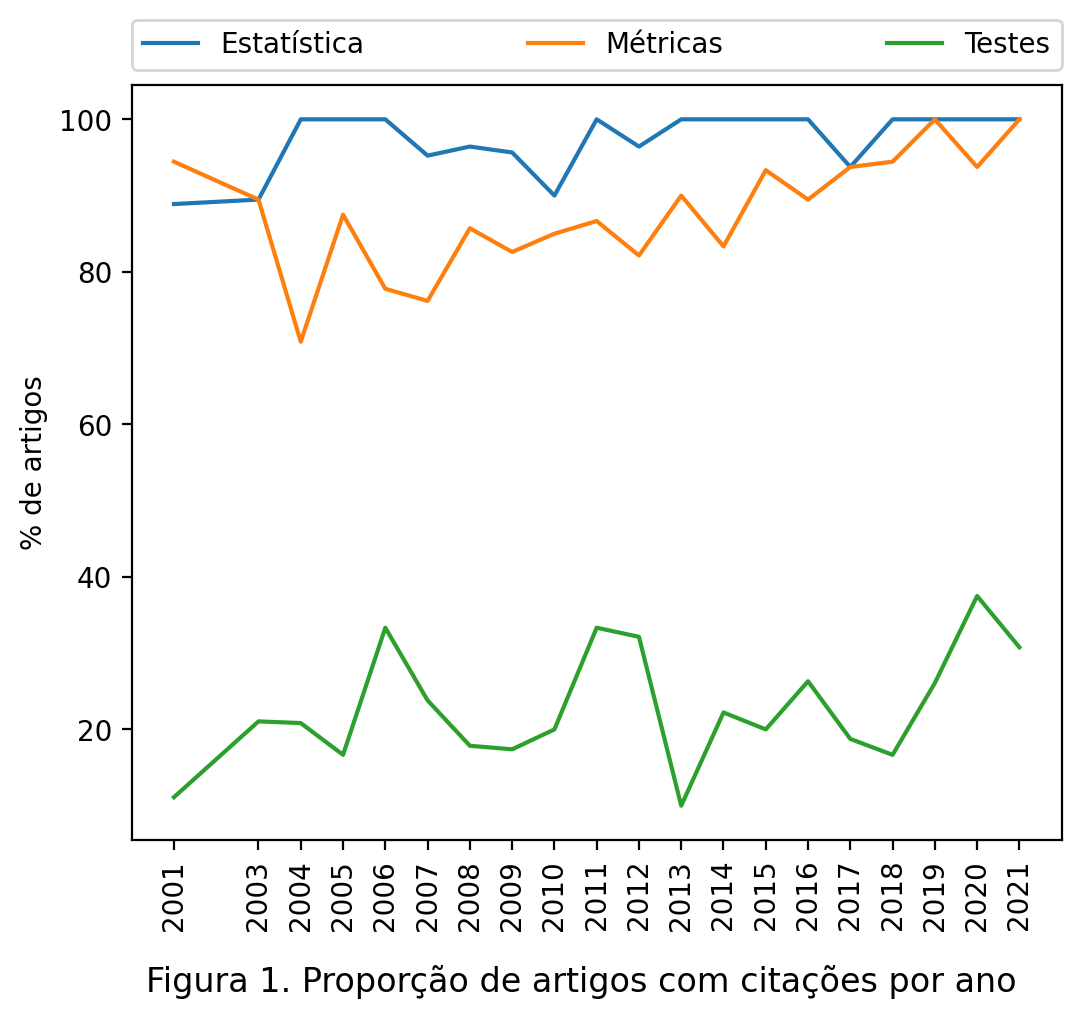

In [47]:
fig = plt.figure(figsize=(6, 5), dpi=200)
ax = fig.gca()
df_grafico_proporcao.fillna(0).mul(100).plot(
  ax = ax,
  ylabel='% de artigos',
  xticks=df_grafico_proporcao.index,
).set_xticklabels(
  df_grafico_proporcao.index,
  rotation='vertical'
)
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
plt.savefig(os.path.join(resultados_path, 'proporcao.svg'))
fig.suptitle(
  'Figura 1. Proporção de artigos com citações por ano',
  y=0.0
)
plt.show()

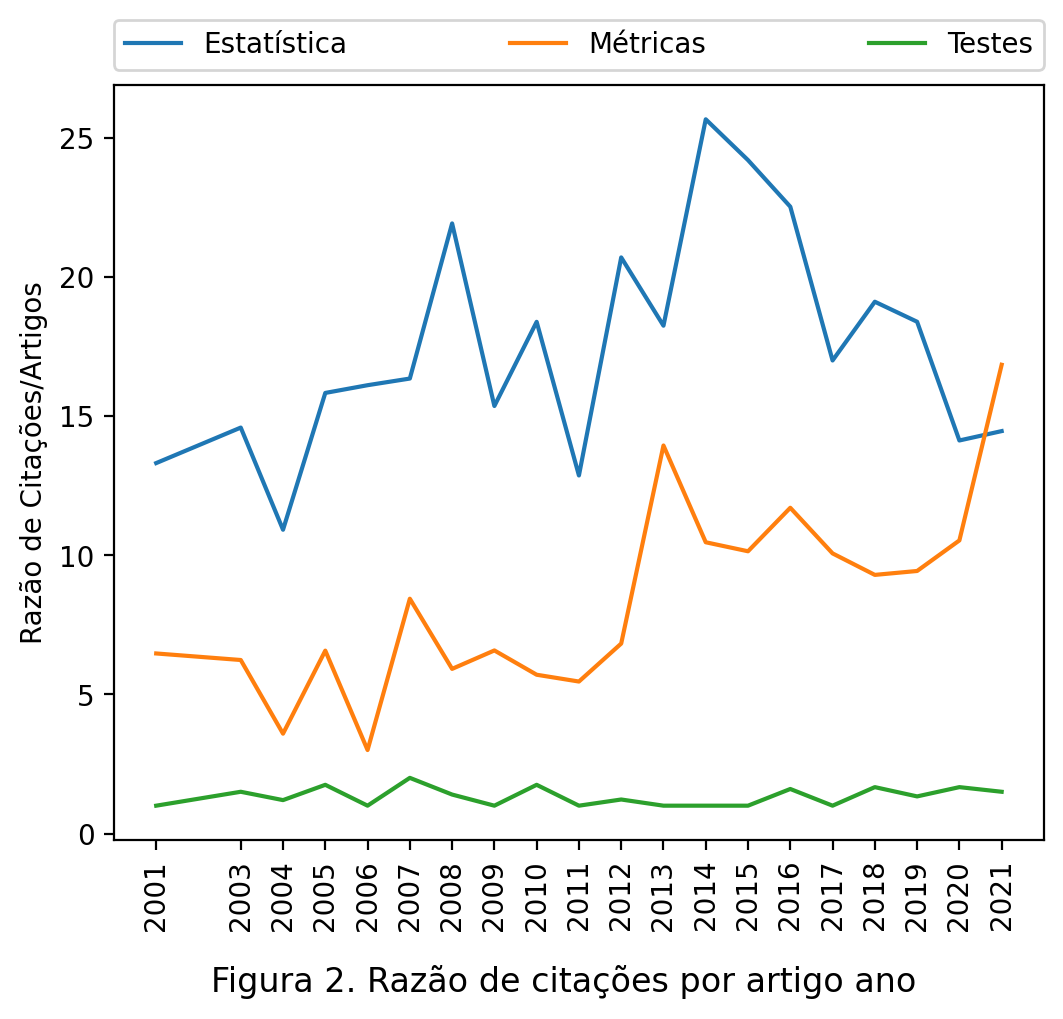

In [48]:
fig = plt.figure(figsize=(6, 5), dpi=200)
ax = fig.gca()
df_grafico_razao.fillna(0).plot(
  ax = ax,
  ylabel='Razão de Citações/Artigos',
  xticks=df_grafico_razao.index
).set_xticklabels(
  df_grafico_razao.index,
  rotation='vertical'
)
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
plt.savefig(os.path.join(resultados_path, 'razao.svg'))
fig.suptitle(
  'Figura 2. Razão de citações por artigo ano',
  y=0.0
)
plt.show()

# ANOVA

In [49]:
# Ref: https://www.reneshbedre.com/blog/anova.html

In [50]:
#df_anova = pd.concat([df_anova_2000_2017, df_anova_2018_2021], ignore_index=True)
df_anova = citacoes[[
  (          'n',     ''),
  ('Estatística', 'art.'),
  (   'Métricas', 'art.'),
  (     'Testes', 'art.'),
]]\
.fillna(0)\
.droplevel(level=1, axis=1).reset_index()
df_anova.columns = ['ano', 'total', 'EST', 'MET', 'TST']

In [51]:
# O artigo do Osório foi publicado em 2018, portanto, deveria repercurtir apenas a partir de 2019
df_anova['tratamento'] = np.where(df_anova['ano'].astype('int') < 2019, 'antes','depois')

In [52]:
df_anova[['ano', 'total', 'MET', 'EST', 'TST', 'tratamento']]

,ano,total,MET,EST,TST,tratamento
0,2001,18,17,16,2,antes
1,2003,19,17,17,4,antes
2,2004,24,17,24,5,antes
3,2005,24,21,24,4,antes
4,2006,18,14,18,6,antes
5,2007,21,16,20,5,antes
6,2008,28,24,27,5,antes
7,2009,23,19,22,4,antes
8,2010,20,17,18,4,antes
9,2011,15,13,15,5,antes


In [53]:
csv_anova_path = os.path.join(resultados_path, 'anova.csv')
df_anova[['ano', 'total', 'MET', 'EST', 'TST', 'tratamento']].to_csv(
  csv_anova_path
  , sep=';'
  , header=True
  , index=False
  , compression=None
  , quoting=csv.QUOTE_NONNUMERIC
  , encoding='iso8859-1'
)

In [54]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway
fvalue, pvalue = stats.f_oneway(
    df_anova[df_anova['tratamento'] == 'antes' ][['EST', 'MET', 'TST']],
    df_anova[df_anova['tratamento'] == 'depois'][['EST', 'MET', 'TST']],
)
print(list(zip(['EST', 'MET', 'TST'],pvalue)))

[('EST', 0.39000438522714154), ('MET', 0.8904689841108893), ('TST', 0.31397502533745575)]


In [55]:
# Residuals (experimental error) are approximately normally distributed
# (Shapiro-Wilks test or histogram)
# null hypothesis that the data was drawn from a normal distribution.

for tipo in ['EST', 'MET', 'TST']:
    # Prevê o tratamento (var categórica) com base no n_art de um dado tipo
    formula = f'{tipo} ~ C(tratamento)'
    # https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols
    reg = smf.ols(formula, data=df_anova).fit()

    # verifica a normalidade dos resíduos
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro
    shapiro_test = stats.shapiro(
      reg.resid
    )
    print(f"{tipo}: p-value ={shapiro_test.pvalue:6.3f}")

EST: p-value = 0.031
MET: p-value = 0.035
TST: p-value = 0.014


Como o p-valor para TST-antes < alpha, os resíduos não são normalmente distribuídos, portanto o teste Mann-Whitney U pode ser mais apropriado para analisar as duas situações

In [56]:
# homoscedasticity or Homogeneity of variances (variances are equal between treatment groups)
# Levene’s, Bartlett’s, or Brown-Forsythe test

# For samples from significantly non-normal populations, Levene’s test levene is more robust.
# null hypothesis that all input samples are from populations with equal variances
# p > alpha, aceita-se H0

for tipo in ['EST', 'MET', 'TST']:
  antes  = df_anova[df_anova['tratamento'] == 'antes'  ][tipo]
  depois = df_anova[df_anova['tratamento'] == 'depois' ][tipo]
  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene
  _,levene_pvalue = stats.levene(antes, depois, center='median')
  print(f"{tipo}: p-value ={levene_pvalue:6.3f}")

# Caso essa condição não seja válida, pode-se usar o teste Alexander Govern
# does not assume on homoscedasticity, instead relaxing the assumption of equal variances.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alexandergovern.html#scipy.stats.alexandergovern

EST: p-value = 0.861
MET: p-value = 0.424
TST: p-value = 0.560


In [57]:
# Observations are sampled independently from each other (no relation in observations between the groups
# and within the groups) i.e., each subject should have only one response

# Aceita como satisfeita

In [58]:
# The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data),
# it is more likely to violate the assumptions of normality and homogeneity of variances.
# If these assumptions are violated, you should consider the non-parametric tests
# (e.g. Mann-Whitney U test, Kruskal-Wallis test).

# Apesar a variável ser discreta, aceita como satisfeita

# Mann-Whitney U test (Wilcoxon rank sum test)

In [59]:
# The observations from the two groups should be randomly selected from the target populations
# Observations are independent of each other
# Observations should be continuous or ordinal (e.g. Likert item data)

In [60]:
# two-sided hypothesis in terms of median
# Null hypothesis: Two groups have equal median

for tipo in ['EST', 'MET', 'TST']:
  antes  = df_anova[df_anova['tratamento'] == 'antes' ][tipo]
  depois = df_anova[df_anova['tratamento'] == 'depois'][tipo]

  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu
  mannwhitneyu_test = stats.mannwhitneyu(
    antes,
    depois,
    alternative = 'two-sided', # Defines the alternative hypothesis: the distributions are not equal, i.e. F(u) ≠ G(u) for at least one u.
    method="exact"
  )
  print(f"{tipo}: p-value ={mannwhitneyu_test.pvalue:6.3f}")

EST: p-value = 0.416
MET: p-value = 0.616
TST: p-value = 0.216


# Correlação ϕk 2019-2018

In [61]:
# Precisamos das ocorrências dos termos em cada artigo para o cálculo da correlação
df_resultados = pd.DataFrame()
# Flag para adicionar o ano apenas uma vez (ao percorrer a 1ª categoria)
adicionou_ano = False
for resultados in (resultados_termos, resultados_metricas, resultados_testes):
  df_categoria = pd.DataFrame()
  for ano in resultados:
    df_ano = pd.DataFrame(resultados[ano])
    if not adicionou_ano:
      df_ano['ano'] = ano
    df_categoria = pd.concat([df_categoria, df_ano], axis=0, verify_integrity=True)       # Mesma categoria, concatena linhas
  df_resultados = pd.concat([df_resultados, df_categoria], axis=1, verify_integrity=True) # Categoria diferente, concatena colunas
  adicionou_ano = True

In [62]:
csv_resultados_path = os.path.join(resultados_path, 'resultados.csv')
df_resultados.to_csv(
  csv_resultados_path
  , sep=';'
  , header=True
  , index=True
  , index_label='artigo'
  , compression=None
  , quoting=csv.QUOTE_NONNUMERIC
  , encoding='iso8859-1'
)

In [63]:
# Estamos interessados apenas nos artigos publicados após 2018
df_ocorrencias = df_resultados[df_resultados['ano'] > 2018].fillna(0).reset_index().rename(columns={'index':'artigo'}).copy()

In [64]:
# Remove colunas(termos) para as quais não existem ocorrências (todos elemenos == 0)
df_ocorrencias = df_ocorrencias.loc[:, (df_ocorrencias != 0).any(axis=0)]

In [65]:
# ajustar o nome de algumas colunas - Siglas Maiúsculas
df_ocorrencias = df_ocorrencias.rename(columns=dict(
    map(lambda sigla: (sigla,legendas.get(sigla, sigla)), df_ocorrencias.columns)
))

In [66]:
# gera a matriz de correlação
matriz_de_correlacao = df_ocorrencias.drop(['ano','artigo'], axis=1).phik_matrix()

interval columns not set, guessing: ['Amostra', 'Desvio Padrão', 'D.Normal/Gaussiana', 'Média', 'Num. Execuções', 'Teste/Experimento', 'Variância', 'Bandwidth', 'BPS', 'Confiabilidade', 'Disponibilidade', 'Eficiência/Acurácia', 'MFLOPS', 'MIPS', 'PPS', 'Speed up', 'TPS', 'P-Valor', 'Teste T', 'Teste U']


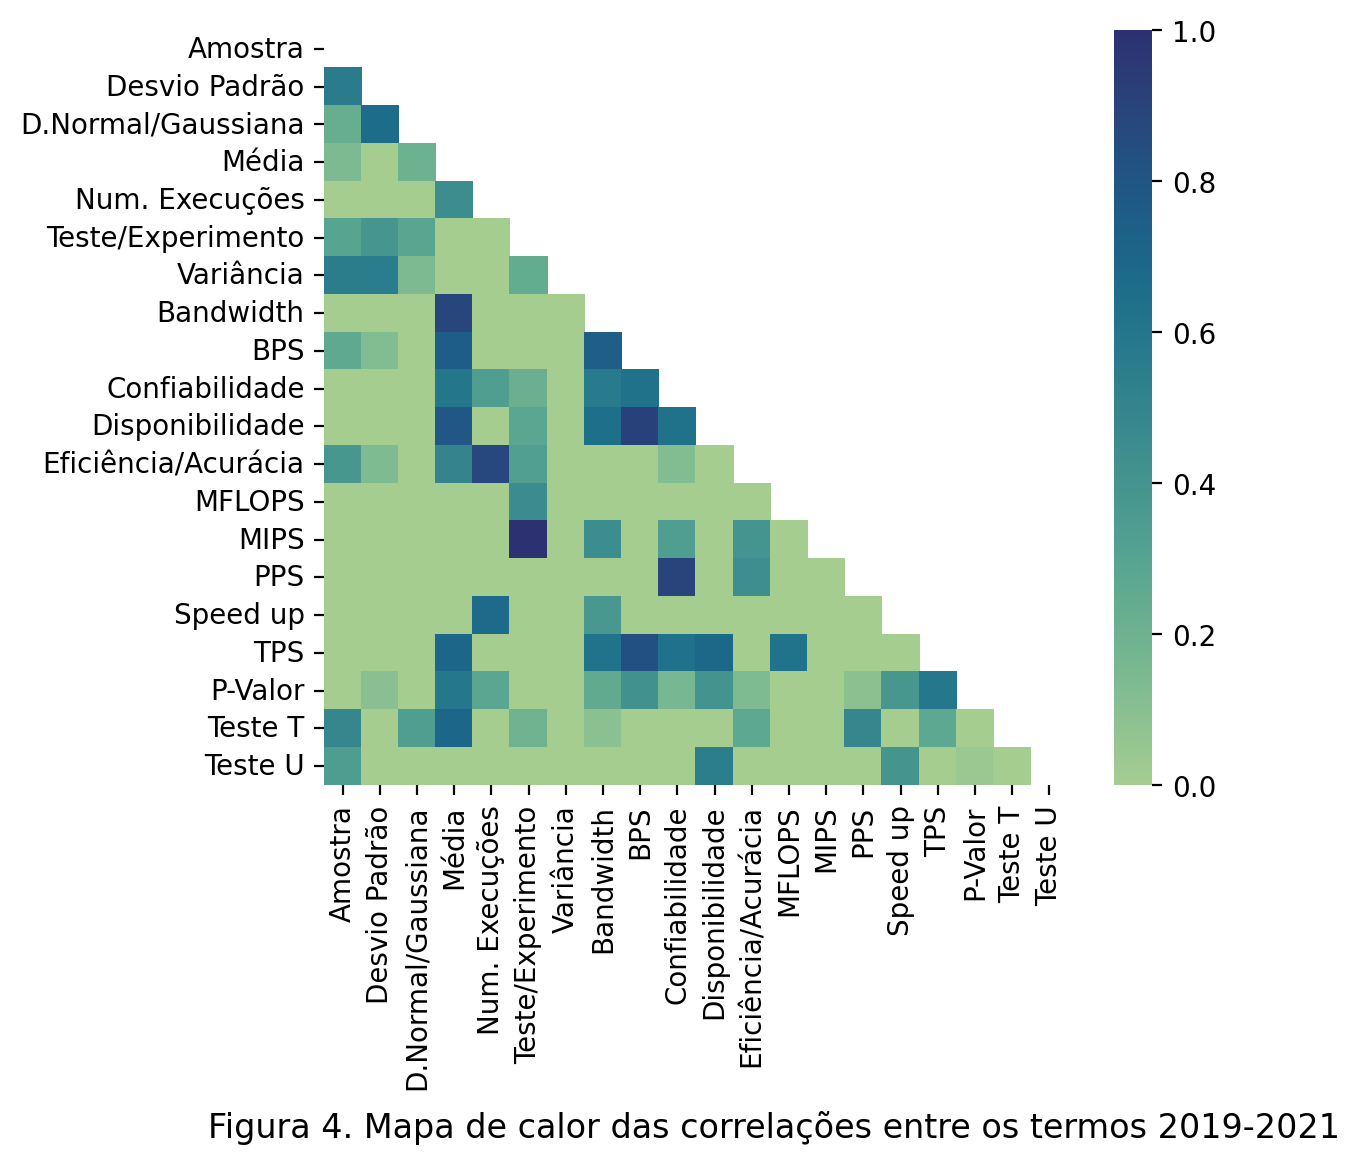

In [67]:
# plota mapa de calor sem a diagonal superior (inclusive a diagonal em si, k=0)
fig = plt.figure(figsize=(6, 5), dpi=200)
ax = sns.heatmap(
  matriz_de_correlacao,
  mask=np.triu(np.ones(matriz_de_correlacao.shape), k=0).astype(bool),
  cmap="crest"
)
plt.savefig(os.path.join(resultados_path, 'heatmap.svg'))
fig.suptitle(
  'Figura 4. Mapa de calor das correlações entre os termos 2019-2021',
  y=-0.2
)
plt.show()

# exporta a matriz para csv
matriz_de_correlacao.to_csv(os.path.join(resultados_path, 'matriz_correlacao_phik.csv'))

In [68]:
# seleciona os valores da diagonal superior, desconsiderando a diagonal em si (k=1)
df_maiores_correlacoes = matriz_de_correlacao.where(
  np.triu(np.ones(matriz_de_correlacao.shape), k=1).astype(bool)
).stack().reset_index()
df_maiores_correlacoes.columns = ['Termo 1', 'Termo 2', 'Correlação']

In [69]:
# Cálcula a co-ocorrência dos termos correlacionados
df_maiores_correlacoes['Núm. co-ocorrências'] = [
  (df_ocorrencias[r[0]].astype(bool) & df_ocorrencias[r[1]].astype(bool)).sum()
  for i,r in df_maiores_correlacoes[['Termo 1','Termo 2']].iterrows()
]
# Seleciona as correlações mairoes que 0.5
df_maiores_correlacoes = df_maiores_correlacoes[df_maiores_correlacoes['Correlação'] > 0.5].sort_values(
  by=['Correlação', 'Termo 1', 'Termo 2'],
  ascending=False
)
df_maiores_correlacoes.style.hide_index()

Termo 1,Termo 2,Correlação,Núm. co-ocorrências
Teste/Experimento,MIPS,1.000000,1
BPS,Disponibilidade,0.914035,4
Confiabilidade,PPS,0.896652,3
Média,Bandwidth,0.892077,9
Num. Execuções,Eficiência/Acurácia,0.873654,1
BPS,TPS,0.826849,4
Média,Disponibilidade,0.785607,8
Média,BPS,0.754286,5
Bandwidth,BPS,0.746212,3
Média,Teste T,0.701448,3


# Selecionar artigos para verificação manual

## Amostragem aleatória simples

In [70]:
tamanho_amostra = 40
autores = ('Bruno', 'Gustavo', 'Fabiano', 'Rodrigo', 'Thiago')
n_autores = len(autores)
artigos_por_autor = tamanho_amostra // n_autores
df_amostra = df_resultados.sample(
    n=tamanho_amostra,
    replace=False,
    random_state=42 # o sentido da vida, o universo e tudo mais
).reset_index().rename(columns={'index':'artigo'})

In [71]:
df_amostra['revisor'] = sorted(autores * artigos_por_autor)

In [72]:
colunas_amostra_head = ['revisor', 'ano', 'artigo']
colunas_amostra_tail = [c for c in list(df_amostra.columns.values) if c not in colunas_amostra_head]

In [73]:
df_amostra[colunas_amostra_head + colunas_amostra_tail]

,revisor,ano,artigo,AM,DP,DN,IC,ME,NE,NI,...,TR,TP,PV,AN,CH,TC,FI,KR,TT,TU
0,Bruno,2005,18986-73-15213-2-10-20220302.pdf,0,2,0,0,6,0,0,...,0,1,0,1,0,0,0,0,0,0
1,Bruno,2015,14270-73-11167-1-10-20210317.pdf,0,7,0,1,12,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Bruno,2013,16779-73-13518-1-10-20210730.pdf,3,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bruno,2004,19012-73-15240-1-10-20220303.pdf,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bruno,2021,18520-73-14911-1-10-20211220.pdf,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,Bruno,2015,14280-73-11177-1-10-20210317.pdf,0,4,5,0,6,0,0,...,0,1,0,0,0,0,0,0,0,0
6,Bruno,2004,18999-73-15227-1-10-20220303.pdf,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bruno,2018,Transactional Boosting on Glasgow Haskell Comp...,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Fabiano,2009,17386-73-13958-1-10-20211004.pdf,1,0,0,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Fabiano,2007,18759-73-15078-1-10-20220203.pdf,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### CSV com os artigos a serem revisados

In [74]:
csv_amostra_path = os.path.join(resultados_path, 'amostra.csv')
df_amostra[colunas_amostra_head + colunas_amostra_tail].to_csv(
  csv_amostra_path
  , sep=';'
  , header=True
  , index=False
  , compression=None
  , quoting=csv.QUOTE_NONNUMERIC
  , encoding='iso8859-1'
)

### Copiar os artigos (pdf e txt) para revisão

In [75]:
import shutil

amostra_path = os.path.join(resultados_path, 'amostra')
if not os.path.exists(amostra_path):
  os.mkdir(amostra_path)

for idx,row in df_amostra[colunas_amostra_head].iterrows():
  revisor = row['revisor']
  ano = row['ano']
  artigo_pdf = row['artigo']
  artigo_txt = f'{artigo_pdf}.tika.txt'
  evento_dir = f'WSCAD{ano}'

  revisor_path = os.path.join(amostra_path, revisor)
  if not os.path.exists(revisor_path):
    os.mkdir(revisor_path)

  src_pdf = os.path.join(dados_path, evento_dir, artigo_pdf)
  src_txt = os.path.join(resultados_path, evento_dir, artigo_txt)
  dst_pdf = os.path.join(revisor_path, f'{evento_dir}__{artigo_pdf}')
  dst_txt = os.path.join(revisor_path, f'{evento_dir}__{artigo_txt}')

  shutil.copyfile(src_pdf, dst_pdf)
  shutil.copyfile(src_txt, dst_txt)

# Informações do ambiente
Lista informações do ambiente para fins de reprodutibilidade

In [76]:
#!pip freeze

# Área de rascunho

In [77]:
# Artigos para verificar remoção das referências bibliográficas após a conversão para TXT
# ./WSCAD2010/A Model to Explore Business Opportunities in Ubiquitous Environments.pdf.tika.txt:  167:	Referências administra o grau de confiabilidade de um 
# ./WSCAD2010/A Model to Explore Business Opportunities in Ubiquitous Environments.pdf.tika.txt:  188:	Referências
# ./WSCAD2010/A Model to Explore Business Opportunities in Ubiquitous Environments.pdf.tika.txt:  374:	Referências que fornece informações sobre a 
# ./WSCAD2010/A Model to Explore Business Opportunities in Ubiquitous Environments.pdf.tika.txt:  457:	Referências 
# ./WSCAD2010/A Model to Explore Business Opportunities in Ubiquitous Environments.pdf.tika.txt:  558:	Referências 
#   5 ./WSCAD2010/A Model to Explore Business Opportunities in Ubiquitous Environments.pdf.tika.txt
# ./WSCAD2015/14287-73-11184-1-10-20210317.pdf.tika.txt:  448:	Referências Bibliográficas 
# ./WSCAD2007/18760-73-15079-1-10-20220203.pdf.tika.txt:  548:	Referências como [Amanon, 2005], [Bailey et Al., 

In [78]:
texto = """
Sistema de 
PerfisSistema de 
Localização 
Sistema de 
Referências 
Assistente Pessoal  
Mudança no Perfil 
ou no Contexto 
Avalia o grau de risco 
dos negociantes 
Envia aviso de 
oportunidade 
Consultor de Oportunidades 
Cruza Desejos, 
Ofertas ou 
Negócios
100100
Authorized licensed use limited to: UNIVERSIDADE ESTADUAL DE OESTE DO PARANA. Downloaded on July 10,2022 at 15:25:19 UTC from IEEE Xplore.  Restrictions apply. 
Figura 8. Cenário de avaliação 
O Sistema de Localização do UbiTrade aperfeiçoou 
a primeira versão [4] usada no MobiLab, através da 
inclusão de um algoritmo de redes neurais para o 
mapeamento em contextos das potências das antenas. 
A triangulação das antenas permite a determinação 
precisa do contexto (uma das nove salas do cenário) 
onde se encontra um usuário portando um dispositivo 
móvel. O sistema foi implementado em duas partes: (1) 
um Webservices criado em C#, que fornece 
informações genéricas de localização e (2) um 
algoritmo de redes neurais implementado com a 
ferramenta JNNS.  
O Assistente Pessoal (AP) foi desenvolvido em C#, 
utilizando o .NET Compact Framework. A biblioteca 
OpenNETCF foi utilizada para suporte a redes sem fio. 
O Assistente foi testado em três modelos de 
smartphones da HTC (HD Touch, P4550 e P4351), em 
iPAQs HP 4700 e em tablet PCs HP tc1100. A Figura 
9 mostra o AP em dois desses equipamentos. 
(a) AP no HTC 4351                   (b) AP no iPAQ HP 4700 
Figura 9. Assistente Pessoal 
Os Sistemas de Perfis e de Categorias foram 
implementados usando o banco de dados relacional 
FireBird. As informações de perfil são cadastradas 
pelos próprios negociantes através do Site de 
Configurações, desenvolvido em ASP.NET, ou por 
meio do Assistente Pessoal. O Consultor de 
Oportunidades e o Sistema de Referências foram 
implementados em C# e executam como Windows 
Services em um servidor. O Gerente de Serviços é 
baseado em Webservices desenvolvidos em C#. 
5. Aspectos de Avaliação 
Diferentes experimentos foram conduzidos para 
avaliação das funcionalidades do UbiTrade. Este artigo 
apresenta um experimento que foi especificamente 
orientado para avaliação da usabilidade do modelo. O 
experimento envolveu 20 voluntários entre professores 
e alunos do curso de Engenharia da Computação na 
Unisinos. O experimento simulou um ambiente de 
Shopping Center, usando o cenário mostrado na Figura 
8. As nove salas foram consideradas lojas e mapeadas 
em contextos. Em cada loja foram registradas dezenas 
de ofertas de produtos e/ou serviços. Os negociantes 
foram orientados a cadastrarem desejos similares às 
áreas de atuação das lojas e também a cadastrarem 
ofertas e desejos complementares entre eles. 
Finalmente, os negociantes se deslocaram livremente 
entre os contextos, verificando o comportamento do 
modelo através das oportunidades de negócios. 
Os participantes responderam a um questionário 
contendo afirmações relacionadas à experiência na 
utilização do UbiTrade. As respostas deviam estar na 
escala Likert [24] de cinco pontos, variando entre 1 
(discordo totalmente) até 5 (concordo totalmente). Os 
sujeitos poderiam escolher também a opção 3 
(indiferente), significando que não tinham nenhuma 
opinião particular a respeito de um determinado 
recurso, ou ainda adicionar comentários, utilizados 
para complementar a avaliação do experimento.  
Os itens do questionário foram elaborados com base 
nos conceitos do modelo de aceitação de tecnologia 
(TAM - Technology Acceptance Model) proposto por 
Davis [25] e aplicado e expandido por Yoon [26] em 
seu estudo sobre aceitação de redes wireless. O modelo 
TAM considera os seguintes itens como principais 
influências para a aceitação de uma nova tecnologia: 
(1) Facilidade de uso percebida: grau em que uma 
pessoa acredita que a tecnologia poderia diminuir os 
seus esforços; (2) Utilidade percebida: grau em que 
uma pessoa acredita que a tecnologia poderia melhorar 
o seu desempenho. A relação das afirmações 
apresentadas aos sujeitos está na Tabela 3. 
Nos resultados obtidos, mais de 70% dos 
negociantes concordaram ou concordaram totalmente 
com as afirmações relacionadas à facilidade de uso 
(afirmações entre 1 e 4). Isso indica que, conforme 
opinião da maioria dos sujeitos, o uso rotineiro do 
modelo poderia diminuir esforços para a identificação 
de oportunidades que atendessem aos seus desejos de 
aquisição ou as ofertas de venda de produtos e/ou 
serviços. O gráfico da Figura 10a resume os resultados 
obtidos nas afirmações entre 1 e 4. 
101101
Authorized licensed use limited to: UNIVERSIDADE ESTADUAL DE OESTE DO PARANA. Downloaded on July 10,2022 at 15:25:19 UTC from IEEE Xplore.  Restrictions apply. 
Tabela 3. Afirmações do questionário. 
No Informe sua opinião sobre as seguintes afirmações... 
1 O Assistente Pessoal do UbiTrade é de fácil compreensão. 
2 Seria fácil me tornar hábil no uso do Assistente Pessoal do UbiTrade. 
3 Não é necessário muito esforço para inclusão de novas Ofertas e Desejos. 
4 As oportunidades são apresentadas de forma clara e objetiva. 
5 As oportunidades foram relevantes conforme meus desejos e minhas ofertas. 
6 O uso do UbiTrade estimula a interação com outros negociantes. 
7 O UbiTrade facilita a identificação de oportunidades de negócios. 
8 O UbiTrade seria útil comercialmente. 
(a) Facilidade de uso (b) Utilidade do modelo 
Figura 10. Resultados da Avaliação 
As afirmações entre 5 e 8 abordam a percepção da 
utilidade do modelo. Nessas afirmações, 79% dos 
negociantes consideram que o UbiTrade seria útil no 
seu dia-a-dia e, que ele melhoraria seus desempenhos 
na identificação de oportunidades comerciais. A Figura 
10b mostra um gráfico ilustrando os resultados obtidos. 
Nesse experimento também é interessante destacar 
os resultados obtidos especificamente na afirmação 8, 
onde 78% dos negociantes concordaram ou 
concordaram totalmente com a afirmação e nenhum 
dos entrevistados discordou ou discordou totalmente. 
Os resultados estimulam o uso do UbiTrade como uma 
solução comercial. 
Em complemento ao questionário, alguns 
comentários foram feitos pelos sujeitos. Um deles foi o 
seguinte: “Vejo grandes perspectivas em um sistema 
como esse. O único problema é a pouca penetração dos 
dispositivos capazes de rodar este tipo de aplicação”. 
Esse comentário é pertinente, pois o Assistente Pessoal 
do protótipo foi desenvolvido somente para a 
plataforma Windows Mobile. Entretanto, como a 
comunicação entre o Assistente Pessoal e o restante do 
modelo UbiTrade é realizada via Webservices, o 
Assistente pode ser implementado em quaisquer outras 
plataformas que suportem esse tipo de serviços, por 
exemplo, Java e Android. 
Além disso, o sistema de localização utilizado pelo 
protótipo do UbiTrade requer que o equipamento 
possua suporte à captura de sinais wireless. Porém, 
qualquer outro tipo de estratégia que seja adotada para 
localização envolverá um dispositivo específico no 
equipamento móvel (por exemplo, leitores de RFID ou 
GPS), o que também introduzirá restrições 
operacionais no seu uso. 
6. Trabalhos Relacionados 
A maioria dos modelos de Comércio Ubíquo 
destina-se a áreas específicas de negócios. O iGrocer 
[14] é um assistente inteligente que auxilia nas 
compras em um supermercado. Uma de suas 
características é a possibilidade de manter um perfil 
nutricional do usuário, sugerindo que um determinado 
produto seja comprado ou evitado. O MyGrocer [13] 
também auxilia os clientes nas compras em 
supermercados. No entanto, seu foco é o controle do 
estoque de produtos, realizado no estabelecimento 
comercial e também nas residências dos usuários. O 
MyGrocer emite alertas quando algum item está em 
falta ou com nível baixo. No mercado de prestação de 
serviços existem sistemas como EPARK [16], 
destinado a auxiliar na administração de 
estacionamentos de veículos e o UTAS [15], criado 
para auxiliar turistas em viagens. O PAM [12] foi o 
único modelo genérico de comércio ubíquo encontrado 
nas pesquisas bibliográficas. Entretanto, o PAM 
considera o usuário somente como consumidor, 
auxiliando-o na busca por produtos e serviços em um 
Shopping Center. 
Através da revisão bibliográfica desse artigo 
[10, 11, 12, 13, 14, 15, 16] constata-se que o UbiTrade 
é o primeiro modelo de comércio ubíquo genérico que 
permite a atuação dos usuários como fornecedores e 
como consumidores de produtos e serviços. 
7. Conclusões 
As principais conclusões deste trabalho são: (1) o 
uso conjunto de informações de localização e de perfis 
introduz novas oportunidades de negócio; (2) as 
informações precisas de localização estimulam o uso 
de dispositivos móveis como instrumento para geração 
de negócios, pois permitem um enfoque orientado a 
contextos; (3) o modelo proposto contém os módulos 
básicos para o suporte à geração de negócios usando 
computação ubíqua; (4) o protótipo e o experimento 
sinalizam a viabilidade da proposta. 
O UbiTrade constitui uma proposta inicial que 
necessita melhorias. O componente Sistema de 
Categorias poderá ser aperfeiçoado através de uma 
ontologia orientada ao comércio ubíquo. Um segundo 
aperfeiçoamento será a criação de um método que 
permitirá ao Consultor de Oportunidades uma previsão 
do comportamento dos negociantes, antecipando assim 
possíveis desejos de compra. Esse método poderá ser 
baseado na análise do histórico de negociações. Assim 
o Consultor considerará também o comportamento e 
não somente os desejos explicitamente informados 
pelo negociante. Ainda, poderão ser realizados 
experimentos adicionais envolvendo um maior número 
de sujeitos e ambientes envolvendo negociações reais.  
102102
Authorized licensed use limited to: UNIVERSIDADE ESTADUAL DE OESTE DO PARANA. Downloaded on July 10,2022 at 15:25:19 UTC from IEEE Xplore.  Restrictions apply. 
8. Referências 
[1] M. Weiser. “The Computer for the 21st Century”, 
Scientific America, vol. 265, no. 3, Sept. 1991, pp. 66-75. 
[2] J. Hightower, A.J. LaMarca, and I.E. Smith, “Practical 
Lessons from Place Lab”, IEEE Pervasive Computing, vol. 5, 
no. 3, 2006, pp.32-39.
"""

In [79]:
# ref = re.search(r'(?s:.*)(REFER.{1,2}NCIAS|REFERENCES)', texto)
# if ref is None:
#   ref = re.search(r'(?s:.*)(Refer.{1,2}ncias)', texto)
# if ref is not None:
#   print(texto[:ref.regs[ref.lastindex][0]])

In [80]:
# import unicodedata

# str_iso = "ê"
# str_utf = "ê"

# for form in ('NFC', 'NFKC', 'NFD', 'NFKD'):
#   print(f'{str_utf}:{form} == {str_iso} -> {unicodedata.normalize(form, str_utf) == str_iso}')